In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

M - число разных шаров  
k - число шаров, которые мы достали на момент получения шаров всех типов
$$
P(k=k) = \frac{M}{M^{k}}\left((M-1)^{k-1} - \sum_{m=1}^{M-2}(-1)^{m+1}C_{M-1}^m(M-1-m)^{k-1}\right)
$$

In [7]:
import scipy


def k_prob(k, M):
    if k < M:
        prob = 0
    else:
        prob = ((M - 1) / M) ** (k - 1) - np.sum(
            [
                (-1) ** (m + 1)
                * scipy.special.binom(M - 1, m)
                * ((M - 1 - m) / M) ** (k - 1)
                for m in np.arange(1, M - 1)
            ]
        )
    return prob

In [8]:
from tqdm import tqdm

M = 12  # Число шаров
N_runs = 100000
k_samples = []
for _ in tqdm(range(N_runs)):
    run = np.zeros(M, bool)
    k = 0  # номер, на котором получим все типы шаров
    while not np.all(run):
        run[np.random.choice(M)] = True
        k += 1
    k_samples.append(k)
k_samples = np.array(k_samples)

  0%|          | 236/100000 [00:00<00:42, 2356.10it/s]

100%|██████████| 100000/100000 [00:41<00:00, 2408.61it/s]


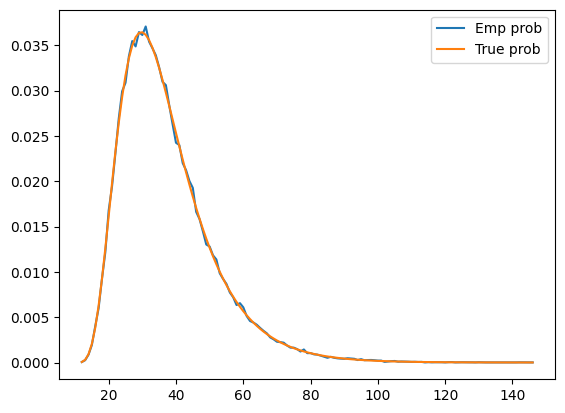

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

ks, counts = np.unique(k_samples, return_counts=True)
plt.plot(ks, counts / N_runs, label="Emp prob")
plt.plot(ks, [k_prob(k, M) for k in ks], label="True prob")
plt.legend()

In [10]:
ks[np.argmax(counts)]

31